### Script contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Visual exploration & data prep
#### 4. Regression analysis
#### 5. Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# prompt matplotlib visuals to appear in notebook 
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Jay\Documents\UFO Sightings Analysis'

In [4]:
# Import most recent data set
df = pd.read_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_mapped.csv')) 

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Date_time', 'city', 'state/province', 'country',
       'UFO_shape', 'length_seconds', 'duration_description', 'description',
       'date_documented', 'latitude', 'longitude'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,Date_time,city,state/province,country,UFO_shape,length_seconds,duration_description,description,date_documented,latitude,longitude
0,0,5/8/2014 18:45,inverloch,none,Australia,light,300,5 minutes,Bright orange light travelling above inverloch...,5/8/2014,-38.627,145.723
1,1,10/7/2013 20:00,oklahoma,OK,United States,circle,10526400,4 months,Bright flying orb.,10/14/2013,35.468,-97.516
2,2,8/3/2008 21:00,virginia beach,VA,United States,fireball,10526400,4 months,this object was very high up and emmited no so...,8/12/2008,36.853,-75.978
3,3,3/1/1994 1:00,menifee,CA,United States,unknown,10526400,4 months,Sun City / Menifee UFO sightings in 1994,2/22/2005,33.728,-117.146
4,4,1/1/1977 2:30,new canaan,CT,United States,unknown,9468000,2-3 years,possible abductions when I was a kid living in...,11/19/1998,41.147,-73.495
5,5,3/15/1984 20:00,griffin,GA,United States,circle,7894800,3 months,7 large yellow lights with red center estimat...,5/15/2006,33.247,-84.264
6,6,6/15/2012 21:00,huntington,NY,United States,light,6312000,1-2 years,Strange lights in the sky that move and follow...,10/14/2013,40.868,-73.426
7,7,12/31/2009 23:30,livingston,LA,United States,unknown,6312000,new years,The 12 UFO we seen brite yellow like a street ...,2/14/2010,30.502,-90.748
8,8,12/31/2006 23:00,imperial desert,CA,United States,oval,6312000,new years eve,The Object was more round than Oval. It was be...,2/1/2007,32.841,-115.590
9,9,8/8/2004 12:00,united states,none,United States,unknown,6312000,years,I thought I saw a UFO but it was a homeland se...,12/14/2004,37.090,-95.713


In [7]:
df.shape

(79997, 12)

In [8]:
# Remove ambiguous number column as in Exercise 6.3
del df['Unnamed: 0']

In [9]:
df.shape

(79997, 11)

#### Missing values

In [10]:
# Check for missing values
df.isnull().sum()

Date_time               0
city                    0
state/province          0
country                 0
UFO_shape               0
length_seconds          0
duration_description    0
description             0
date_documented         0
latitude                0
longitude               0
dtype: int64

##### No missing values found

#### Extreme value checks

C:\Users\Jay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_seconds', ylabel='Density'>

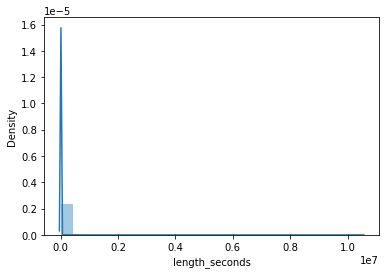

In [11]:
sns.distplot(df['length_seconds'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

##### While there are several observations exceeding 5M secs and a few exceeding 10M seconds, these usually concur with the duration_description observations. The above plot would not generate using a larger bin size, in attempt to display these more distinctly.

In [12]:
# Check the mean
df['length_seconds'].mean()

3697.921809567859

In [13]:
# Check the median
df['length_seconds'].median()

180.0

In [14]:
# Check the max
df['length_seconds'].max() 

10526400

### 3. Visual exploration & data prep

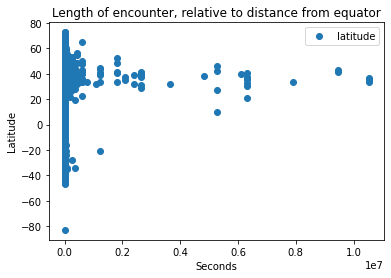

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x= 'length_seconds', y= 'latitude', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of encounter, relative to distance from equator')  
plt.xlabel('Seconds')  
plt.ylabel('Latitude')  
plt.show()

##### The majority of encounters of longer duration appear to have occurred around the middle of the Northern hemisphere, i.e. above the equator. The tick marks on the x-axis seem to reflect a multiplier of 10M.

Hypothesis: When viewing a larger spread of median length observations (i.e. around 180 seconds, or three minutes in duration), a significant percentage will be seen in the Southern hemisphere, while the vast majory will remain in the Northern hemisphere. 

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['length_seconds'].values.reshape(-1,1)
y = df['latitude'].values.reshape(-1,1)

In [17]:
X

array([[     300],
       [10526400],
       [10526400],
       ...,
       [      60],
       [       0],
       [   10800]], dtype=int64)

In [18]:
y

array([[-38.627],
       [ 35.468],
       [ 36.853],
       ...,
       [ 46.228],
       [ 41.75 ],
       [ 48.208]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [20]:
# Create a regression object: This is the regression object, which will be fit onto the training set.
regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

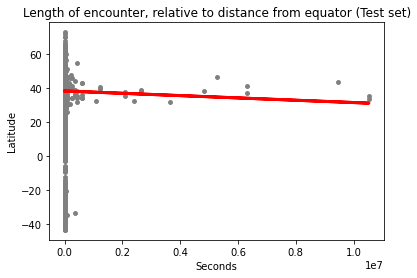

In [23]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of encounter, relative to distance from equator (Test set)')
plot_test.xlabel('Seconds')
plot_test.ylabel('Latitude')
plot_test.show()

##### The line appears to concur with the previous interpretation, where the longest recorded duration events occur in the Northern hemisohere. Removing all observations exceeding 2M seconds may be a consideration. While these are noteworthy events, they are essentially outliers in terms of their duration.

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.80167224e-07]]
Mean squared error:  104.53728146780055
R2 score:  -7.297695208530186e-05


In [26]:
y_predicted

array([[38.1656403 ],
       [38.16584435],
       [38.16596678],
       ...,
       [38.16613002],
       [38.16621164],
       [38.1656403 ]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,47.253,38.165640
1,49.250,38.165844
2,47.240,38.165967
3,32.329,38.166242
4,41.850,38.166171
5,26.358,38.161355
6,44.781,38.166239
7,-25.274,38.165028
8,41.584,38.166171
9,36.606,38.166048


##### All values in the predicted array are nearly identical up to three decimal points, with a few variances. Only two displayed results from the test set are accurate within a single decimal point. The negative R2 score above would seem to indicate the test set is not a good fitting model.

#### Compare how the regression fits the training set

In [28]:
# Predict: This is predicting X_train!
y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.80167224e-07]]
Mean squared error:  108.44565049778018
R2 score:  5.0487448730152096e-05


##### Notably higher R2 score for the training set.

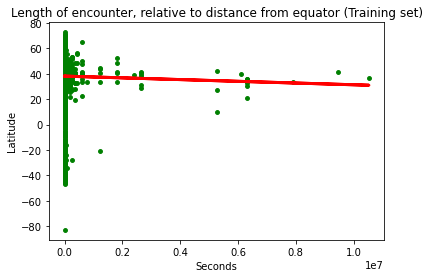

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Length of encounter, relative to distance from equator (Training set)')
plot_test.xlabel('Seconds')
plot_test.ylabel('Latitude')
plot_test.show()

##### While the slope is identical and resulting plot appears similar, the scale of measurement in the y-axis is expanded, as seen in the example notebook as well.

### 5. Bonus: performance improvement after removing outliers

In [32]:
# Clean extreme values from "length_seconds" variable
df_test = df[df['length_seconds'] <=2000000] 

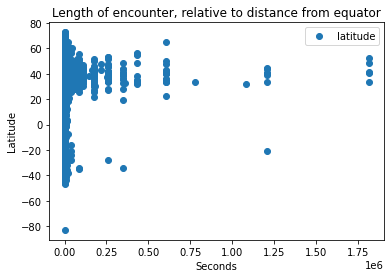

In [33]:
# Try the scatterplot without outliers
df_test.plot(x = 'length_seconds', y='latitude', style='o')  
plt.title('Length of encounter, relative to distance from equator')  
plt.xlabel('Seconds')  
plt.ylabel('Latitude')  
plt.show()

##### A slightly different spread is beginning to show here. The x-axis multipliers now appear to be 1M. Another consideration may be to remove observations less than 3 seconds, as those 0-2 seconds represent only 3.79% of the data.

In [34]:
# Reshape again
X_2 = df_test['length_seconds'].values.reshape(-1,1)
y_2 = df_test['latitude'].values.reshape(-1,1)

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Run and fit the regression
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.72716011e-06]]
Mean squared error:  105.25956063267195
R2 score:  -0.000495765573125917


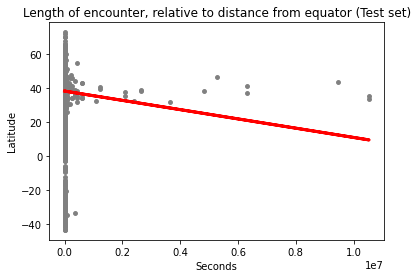

In [42]:
# Visualizing the test set results
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Length of encounter, relative to distance from equator (Test set)')
plot_test.xlabel('Seconds')
plot_test.ylabel('Latitude')
plot_test.show()

##### The new test set outliers are farther from the new regression line, which has a more pronounced slope compared to the original test plot. A model with better dimensional symmetry would be needed for a proper analysis. While there may still be potential biases, none are apparent to me at this stage.

In [44]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,38.108,38.102501
1,32.083,38.102583
2,32.461,38.092779
3,32.838,38.102106
4,38.357,38.102515
5,45.446,38.100960
6,59.329,38.101451
7,36.073,38.102591
8,45.133,38.102569
9,36.187,38.102569


In [45]:
# export current dataframe to Prepared Data
df.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_regressed.csv')) 